In [12]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint

def ribofinal(y, t, rates, parameters):
	b= rates[0]
	dm= rates[1]
	kb= rates[2]
	ku= rates[3]
	f= rates[4]

	Kp= parameters[0]
	thetar= parameters[1]
	k_cm= parameters[2]
	kq= parameters[3]
	numr0= parameters[4]
	numq0= parameters[5]
	nume0= parameters[6]
	nump0= parameters[7]
	thetax= parameters[8]
	gmax= parameters[9]
	aatot= parameters[10]
	vt= parameters[11]
	Kt= parameters[12]
	s0= parameters[13]
	vm= parameters[14]
	Km= parameters[15]
	ns= parameters[16]
	nq= parameters[17]
	nr= parameters[18]
	nx= parameters[19]
	cl= parameters[20]

	a= y[0]
	em= y[1]
	et= y[2]
	mm= y[3]
	mp= y[4]
	mq= y[5]
	mr= y[6]
	mt= y[7]
	p= y[8]
	q= y[9]
	r= y[10]
	rmm= y[11]
	rmp= y[12]
	rmq= y[13]
	rmr= y[14]
	rmt= y[15]
	si= y[16]
	zmm= y[17]
	zmp= y[18]
	zmq= y[19]
	zmr= y[20]
	zmt= y[21]

	Kg= gmax/Kp
	gamma= gmax*a/(Kg + a)
	ttrate= (rmq + rmr + rmp + rmt + rmm)*gamma
	lam= ttrate/aatot
	fr= nr*(r + rmr + rmp + rmt + rmm + rmq + zmr + zmp + zmt + zmm + zmq) / ( nr*(r + rmr + rmp + rmt + rmm + rmq + zmr + zmp + zmt + zmm + zmq) + nx * (p + q + et + em))
	nucat= em*vm*si/(Km + si)

	dydt= np.empty(22)
	dydt[0]= +ns*nucat-ttrate-lam*a
	dydt[1]= +gamma/nx*rmm-lam*em
	dydt[2]= +gamma/nx*rmt-lam*et
	dydt[3]= +(nume0*a/(thetax + a))+ku*rmm+gamma/nx*rmm-kb*r*mm-dm*mm-lam*mm
	dydt[4]= +(nump0*a/(thetax + a))+ku*rmp+gamma/nx*rmp-kb*r*mp-dm*mp-lam*mp
	dydt[5]= +(numq0*a/(thetax + a)/(1 + (q/kq)**nq))+ku*rmq+gamma/nx*rmq-kb*r*mq-dm*mq-lam*mq
	dydt[6]= +(numr0*a/(thetar + a))+ku*rmr+gamma/nr*rmr-kb*r*mr-dm*mr-lam*mr
	dydt[7]= +(nume0*a/(thetax + a))+ku*rmt+gamma/nx*rmt-kb*r*mt-dm*mt-lam*mt
	dydt[8]= +gamma/nx*rmp-lam*p
	dydt[9]= +gamma/nx*rmq-lam*q
	dydt[10]= +ku*rmr+ku*rmt+ku*rmm+ku*rmp+ku*rmq+gamma/nr*rmr+gamma/nr*rmr+gamma/nx*rmt+gamma/nx*rmm+gamma/nx*rmp+gamma/nx*rmq-kb*r*mr-kb*r*mt-kb*r*mm-kb*r*mp-kb*r*mq-lam*r
	dydt[11]= +kb*r*mm+b*zmm-ku*rmm-gamma/nx*rmm-f*rmm-lam*rmm
	dydt[12]= +kb*r*mp+b*zmp-ku*rmp-gamma/nx*rmp-f*rmp-lam*rmp
	dydt[13]= +kb*r*mq+b*zmq-ku*rmq-gamma/nx*rmq-f*rmq-lam*rmq
	dydt[14]= +kb*r*mr+b*zmr-ku*rmr-gamma/nr*rmr-f*rmr-lam*rmr
	dydt[15]= +kb*r*mt+b*zmt-ku*rmt-gamma/nx*rmt-f*rmt-lam*rmt
	dydt[16]= +(et*vt*s0/(Kt + s0))-nucat-lam*si
	dydt[17]= +f*rmm-b*zmm-lam*zmm
	dydt[18]= +f*rmp-b*zmp-lam*zmp
	dydt[19]= +f*rmq-b*zmq-lam*zmq
	dydt[20]= +f*rmr-b*zmr-lam*zmr
	dydt[21]= +f*rmt-b*zmt-lam*zmt

	return dydt

#######

# parameters
Kp= 10.7705 # Part of translation elongation rate
thetar= 1896.62 # Ribosome transcription threshold
k_cm= 0.00554752/662.435565 #  cloramphenicol threshold (?)
kq= 118691.0 # q-autoinhibition threshold
numr0= 1000.0 / 10.0 # max ribosome transcription rate
numq0= 4185.68 / 10.0 # max growth-independent transcription rate
nume0= 10.4338 / 10.0 # max enzyme transcription rate
nump0= 0 # max ??? --it is always zero in the current set of parameters
thetax= 0 # Non-ribosomal transcription threshold (?)
gmax= 1260.0 # Max elongation threshold
aatot= 1.0e8 # Total cell mass
vt= 726.0 # Max nutrient import rate
Kt= 1.0e3 # Nutrient import threshold
s0= 1.0e4 # Initial external nutrient
vm= 5800.0 # Max enzymatic rate
Km= 1.0e3 # Enzymatic threshold
ns= 0.1 # Nutrient efficiency
nq= 4 # h1? q-autoinhibition Hill coefficient
nr= 7549.0 # Ribosome length
nx= 300.0 # Length of non ribosomal proteins
cl= 0 # chloramphenicol-binding rate
parameters= np.asarray([ Kp, thetar, k_cm, kq, numr0, numq0, nume0, nump0, thetax, gmax, aatot, vt, Kt, s0, vm, Km, ns, nq, nr, nx, cl])

# define rate constants
b= 0
dm= 0.1
kb= 1
ku= 1.0
f= cl*k_cm
rates= np.asarray([ b, dm, kb, ku, f])

# define initial conditions
a_0= 1000.0
em_0= 0
et_0= 0
mm_0= 0
mp_0= 0
mq_0= 0
mr_0= 0
mt_0= 0
p_0= 0
q_0= 0
r_0= 100000.0
rmm_0= 0
rmp_0= 0
rmq_0= 0
rmr_0= 0
rmt_0= 0
si_0= 0
zmm_0= 0
zmp_0= 0
zmq_0= 0
zmr_0= 0
zmt_0= 0
init= np.asarray([ a_0, em_0, et_0, mm_0, mp_0, mq_0, mr_0, mt_0, p_0, q_0, r_0, rmm_0, rmp_0, rmq_0, rmr_0, rmt_0, si_0, zmm_0, zmp_0, zmq_0, zmr_0, zmt_0])

# call odeint (note args must be a tuple) 
t= np.linspace(0, 100, 10)
species= ['a', 'em', 'et', 'mm', 'mp', 'mq', 'mr', 'mt', 'p', 'q', 'r', 'rmm', 'rmp', 'rmq', 'rmr', 'rmt', 'si', 'zmm', 'zmp', 'zmq', 'zmr', 'zmt']
y= odeint(ribofinal, init, t, args= (rates, parameters), mxstep= 10000)


In [13]:
import pandas as pd
df = pd.DataFrame(columns=species,data = [y[i,:] for i in range(len(y))])

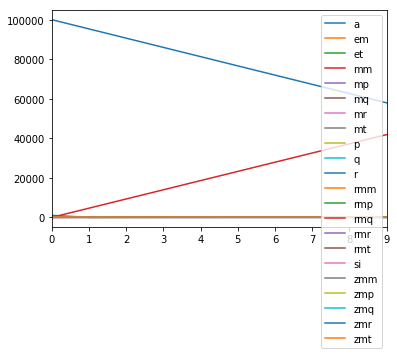

In [14]:
%matplotlib inline
df.plot(kind="line")

In [11]:
import re

In [15]:
df.filter(regex=r'^r.+')

rmm           rmp           rmq       rmr         rmt
0    0.000000  0.000000e+00      0.000000  0.000000    0.000000
1   11.592900  0.000000e+00   4650.670721  1.637937   11.592900
2   23.185655  0.000000e+00   9301.283419  1.637918   23.185655
3   34.778237  5.865905e-23  13951.826765  1.637898   34.778237
4   46.370626  2.411384e-21  18602.292638  1.637877   46.370626
5   57.962798  3.130572e-21  23252.671436  1.637853   57.962798
6   69.554724  1.638279e-22  27902.951665  1.637828   69.554724
7   81.146370  1.787278e-21  32553.119400  1.637801   81.146370
8   92.737693  2.112582e-21  37203.157541  1.637772   92.737693
9  104.328639  2.154922e-21  41853.044774  1.637741  104.328639

In [ ]:
df